# Import and Setup

Adjust cell width to view more content

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Import general packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import datetime

Import YLXPS-related packages

In [3]:
import sys 
sys.path.insert(0, '/gpfs/loomis/project/david_moore/aj487/purity_monitor/')
sys.path.insert(0, '/gpfs/loomis/project/david_moore/aj487/purity_monitor/analysis/')
import StandMonitor
import WaveformClass as Wvf
import HelperClasses as HelpC
import RunAnalysis as An
import PlotFunctions as Plt

# Data Read-In

In [4]:
FilePath = '/project/fas/david_moore/zl423/PurityData/20200903/'

In [5]:
Files = sorted(glob.glob(FilePath+'Vacuum*'))

In [6]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

In [7]:
arg = Namespace(filepath=Files, dirpath=None, txt=False, show=True)

# Analysis

In [8]:
print(Files)

['/project/fas/david_moore/zl423/PurityData/20200903/Vacuum_Au-Thorslabs_1cm_C-100V_A-100V_1.h5', '/project/fas/david_moore/zl423/PurityData/20200903/Vacuum_Au-Thorslabs_1cm_C-100V_A-200V_1.h5', '/project/fas/david_moore/zl423/PurityData/20200903/Vacuum_Au-Thorslabs_1cm_C-100V_A-200V_2.h5', '/project/fas/david_moore/zl423/PurityData/20200903/Vacuum_Au-Thorslabs_1cm_C-100V_A-200V_3.h5', '/project/fas/david_moore/zl423/PurityData/20200903/Vacuum_Au-Thorslabs_1cm_C-100V_A-200V_4.h5']


## Vacuum Measurement

In [9]:
ch1 = Wvf.WFM(ID=1, Pol=1)
ch2 = Wvf.WFM(ID=2, Pol=-1)
channels = [ch1, ch2]

FileNames, Method = An.ChooseFilesToAnalyze(arg)
for File in FileNames: 
    An.ImportDataFromHDF5(File, channels)

An.DoAnalysis(channels)

 | Filename... /project/fas/david_moore/zl423/PurityData/20200903/Vacuum_Au-Thorslabs_1cm_C-100V_A-100V_1.h5
 | Number of files in ch1...	 15/15
 | Number of files in ch2...	 15/15
 | Filename... /project/fas/david_moore/zl423/PurityData/20200903/Vacuum_Au-Thorslabs_1cm_C-100V_A-200V_1.h5
 | Number of files in ch1...	 19/34
 | Number of files in ch2...	 19/34
 | Filename... /project/fas/david_moore/zl423/PurityData/20200903/Vacuum_Au-Thorslabs_1cm_C-100V_A-200V_2.h5
 | Number of files in ch1...	 9/43
 | Number of files in ch2...	 9/43
 | Filename... /project/fas/david_moore/zl423/PurityData/20200903/Vacuum_Au-Thorslabs_1cm_C-100V_A-200V_3.h5
 | Number of files in ch1...	 22/65
 | Number of files in ch2...	 22/65
 | Filename... /project/fas/david_moore/zl423/PurityData/20200903/Vacuum_Au-Thorslabs_1cm_C-100V_A-200V_4.h5
 | Number of files in ch1...	 10/75
 | Number of files in ch2...	 10/75
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  3.5810856

In [10]:
ChargeCollection = ch1.Max / ch2.Max
DiffMinute = int((np.max(ch1.TimeStamp) - np.min(ch1.TimeStamp)).seconds/60.0 + 0.5)
XTicks = int((DiffMinute/12.0 + 0.5))+1

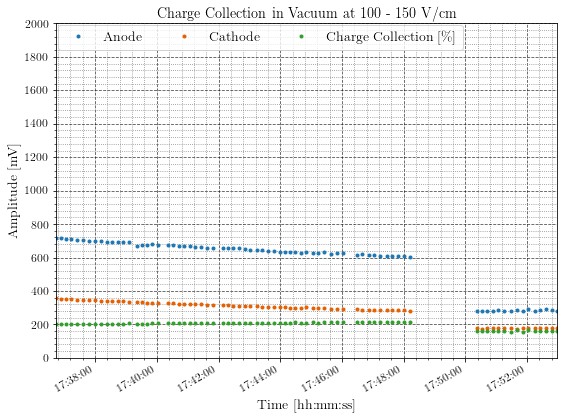

In [11]:
Plt.PltTime(Time=ch1.TimeStamp,
            Data=[ch1.Max,ch2.Max,ChargeCollection*100],
            Legend=['Anode','Cathode','Charge Collection [\%]'],
            Label='Amplitude [mV]',
            XTicks=XTicks,
            YTicks=200,
            YRange=[0,2000],
            SaveName='amp_ratio',
            Title='Charge Collection in Vacuum at 100 - 150 V/cm',
            Save=False)
# plt.savefig('amp.pdf', bbox_inches='tight')

## Argon Gas Measurement
Filled outer chamber with 1bar of argon gas

In [12]:
Files2 = sorted(glob.glob(FilePath+'GAr*'))
Files2 = [x for x in Files2 if '200V' in x]
print(Files2)
arg2 = Namespace(filepath=Files2, dirpath=None, txt=False, show=True)

ch3 = Wvf.WFM(ID=1, Pol=1)
ch4 = Wvf.WFM(ID=2, Pol=-1)
channels2 = [ch3, ch4]

FileNames2, Method = An.ChooseFilesToAnalyze(arg2)
for File in FileNames2: 
    An.ImportDataFromHDF5(File, channels2)

An.DoAnalysis(channels2)

['/project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_C-200V_A-200V_1.h5', '/project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_C-200V_A-200V_2.h5', '/project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_C-200V_A-200V_3.h5', '/project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_C-200V_A-200V_4.h5']
 | Filename... /project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_C-200V_A-200V_1.h5
 | Number of files in ch1...	 14/14
 | Number of files in ch2...	 14/14
 | Filename... /project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_C-200V_A-200V_2.h5
 | Number of files in ch1...	 33/47
 | Number of files in ch2...	 33/47
 | Filename... /project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_C-200V_A-200V_3.h5
 | Number of files in ch1...	 66/113
 | Number of files in ch2...	 66/113
 | Filename... /project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_

In [13]:
ChargeCollection2 = ch3.Max / ch4.Max
DiffMinute2 = int((np.max(ch3.TimeStamp) - np.min(ch3.TimeStamp)).seconds/60.0 + 0.5)
XTicks2 = int((DiffMinute2/12.0 + 0.5))+1

In [14]:
print(np.mean(ChargeCollection2))

1.1115759259175129


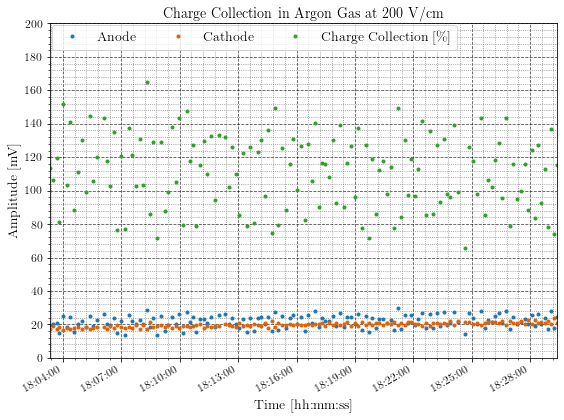

In [15]:
Plt.PltTime(Time=ch3.TimeStamp,
            Data=[ch3.Max,ch4.Max,ChargeCollection2*100],
            Legend=['Anode','Cathode','Charge Collection [\%]'],
            Label='Amplitude [mV]',
            XTicks=XTicks2,
            YTicks=20,
            YRange=[0,200],
            SaveName='amp_ratio',
            Title='Charge Collection in Argon Gas at 200 V/cm',
            Save=False)

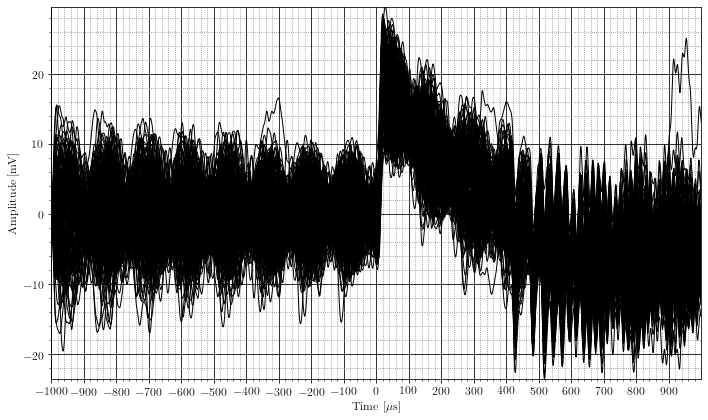

In [16]:
Plt.PltWfm(Time=ch3.Time,
           Data=list(ch3.AmpClean),
           Legend=['Anode'],
           XTicks=100,
           YTicks=10,
           SaveName='avg_waveform',
           Color='k')

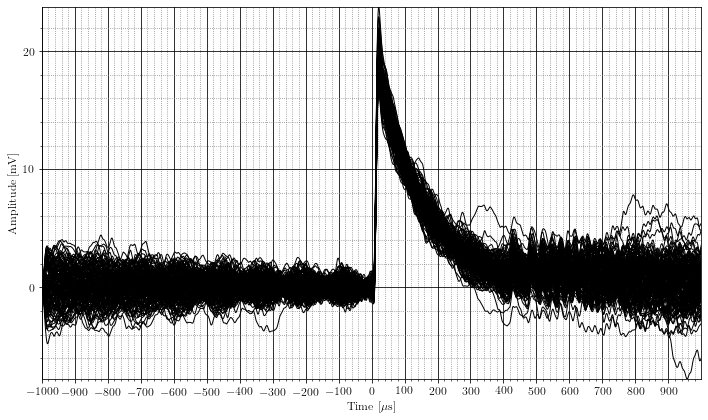

In [17]:
Plt.PltWfm(Time=ch4.Time,
           Data=list(ch4.AmpClean),
           Legend=['Cathode'],
           XTicks=100,
           YTicks=10,
           SaveName='avg_waveform',
           Color='k')

In [18]:
Files3 = sorted(glob.glob(FilePath+'GAr*'))
Files3 = [x for x in Files3 if '100V' in x]
print(Files3)

['/project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_C-100V_A-100V_1.h5', '/project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_C-100V_A-100V_2.h5', '/project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_C-100V_A-100V_3.h5']


In [19]:
arg3 = Namespace(filepath=Files3, dirpath=None, txt=False, show=True)

ch5 = Wvf.WFM(ID=1, Pol=1)
ch6 = Wvf.WFM(ID=2, Pol=-1)
channels3 = [ch5, ch6]

FileNames3, Method = An.ChooseFilesToAnalyze(arg3)
for File in FileNames3: 
    An.ImportDataFromHDF5(File, channels3)

An.DoAnalysis(channels3)

ChargeCollection3 = ch5.Max / ch6.Max
DiffMinute3 = int((np.max(ch5.TimeStamp) - np.min(ch5.TimeStamp)).seconds/60.0 + 0.5)
XTicks3 = int((DiffMinute3/12.0 + 0.5))+1

 | Filename... /project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_C-100V_A-100V_1.h5
 | Number of files in ch1...	 32/32
 | Number of files in ch2...	 32/32
 | Filename... /project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_C-100V_A-100V_2.h5
 | Number of files in ch1...	 54/86
 | Number of files in ch2...	 54/86
 | Filename... /project/fas/david_moore/zl423/PurityData/20200903/GAr_Au-Thorslabs_1cm_C-100V_A-100V_3.h5
 | Number of files in ch1...	 17/103
 | Number of files in ch2...	 17/103
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  22.352066962 sec


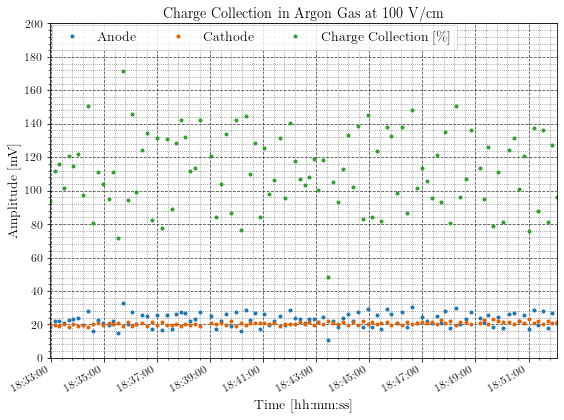

In [20]:
Plt.PltTime(Time=ch5.TimeStamp,
            Data=[ch5.Max,ch6.Max,ChargeCollection3*100],
            Legend=['Anode','Cathode','Charge Collection [\%]'],
            Label='Amplitude [mV]',
            XTicks=XTicks,
            YTicks=20,
            YRange=[0,200],
            SaveName='amp_ratio',
            Title='Charge Collection in Argon Gas at 100 V/cm',
            Save=False)
plt.savefig('20200903_argon_1bar.pdf', bbox_inches='tight')